# Are We Rich Yet?

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Describe data set and fields:

The data set contains about six years of pricing data in the following X fields:

- Trade date: `date`
- Daily open trading price: `open`
- Daily high trading price: `open`
- Daily low trading price: `open`
- Daily close trading price: `open`
- Daily volume trading price: `open`

Derived fields:

- Next day's closing price: `close_1`

- **Target variable**: response to promotion `results`...this is our **response** or **y**.



## 1. Features and a simple classifier

### Get, check, clean,  the data

In [3]:
df=pd.read_csv("data/IYR.csv")
df.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signalt,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2010-01-04,46.450001,46.660000,45.529999,45.810001,16952700,45.919998,True,0.002401,43.799999,False,-0.043877,1,47.639866,45.7345,43.829134,0.519813,8.332290,False,False,False,0,0,44.250796,40.977224,40.666430,True,True,42.964314,41.446505,39.687018,True,True,47.899399,False,29.532814,25.622815,19.705172,True,True,1,80,True,-19.985297,0,0.780138,0.868801,-0.088663,False,2.428798,True,56.828598,0,1.215208,0,53.874570,0,41.244019,0,-63.392854,0,-3233039.650530,False,16.105949,29.281134,1,0.000000,2.298156,1,0.189764,True,46.000000,50.419998,44.060001,52.359997,39.640003,56.779995,37.700004,True
1,2010-01-05,45.810001,45.959999,45.290001,45.919998,14523000,45.900002,False,-0.000435,44.119999,False,-0.039199,1,47.660512,45.7585,43.856488,0.542455,8.313262,False,False,False,0,0,44.316255,41.042691,40.718704,True,True,43.012126,41.525376,39.812894,True,True,47.804623,False,28.008132,24.242509,20.573319,True,True,1,80,True,-53.292530,0,0.703839,0.835809,-0.131969,False,2.249153,True,48.760069,0,0.679669,0,54.661907,0,43.073801,0,-65.584491,0,-657379.254835,False,12.573499,17.236026,1,8.977150,2.992383,1,0.191900,True,45.723333,49.866663,43.506666,52.083330,39.363336,56.226660,37.146669,True
2,2010-01-06,45.939999,46.230000,45.709999,45.900002,14859100,46.310001,True,0.008932,43.740002,False,-0.047059,1,47.654105,45.8210,43.987895,0.521549,8.001158,False,False,False,0,0,44.378363,41.107026,40.770260,True,True,43.066403,41.602976,39.916297,True,True,47.653746,False,26.917506,25.435159,19.686896,True,True,1,76,True,-37.012487,0,0.634445,0.795536,-0.161091,False,2.016278,True,56.429146,0,-0.563254,0,54.479851,0,39.780550,0,-66.233712,0,-816785.273366,False,22.999634,17.226361,0,6.901372,5.292841,1,0.193347,True,45.946667,50.313332,43.953335,52.306664,39.586670,56.673329,37.593338,True
3,2010-01-07,45.869999,46.520000,45.369999,46.310001,16364700,46.000000,False,-0.006694,44.139999,False,-0.046858,-1,47.636673,45.9175,44.198327,0.614154,7.488094,False,False,False,0,0,44.454113,41.175940,40.825381,True,True,43.139411,41.682390,40.041486,True,True,47.511921,False,25.397447,23.068010,20.606229,True,True,1,72,True,-29.312112,0,0.605552,0.757539,-0.151987,False,1.895537,True,55.764453,0,-0.728834,0,57.598215,0,46.390587,0,-52.922047,0,2497548.393800,True,36.835206,24.136113,0,100.000000,38.626174,-1,0.194417,True,46.066667,50.553331,44.193334,52.426664,39.706670,56.913328,37.833337,True
4,2010-01-08,46.189999,46.230000,45.590000,46.000000,10629500,46.220001,True,0.004783,43.720001,False,-0.049565,1,47.556586,46.0015,44.446414,0.499518,6.761021,False,False,False,0,0,44.514736,41.239835,40.876870,True,True,43.210449,41.756302,40.157529,True,True,47.378606,False,23.985964,21.705970,19.389544,True,True,1,68,True,-56.291656,0,0.551285,0.716289,-0.165003,False,1.693048,True,57.228793,0,-1.435608,0,54.555067,0,51.744576,0,-62.987021,0,4577581.772970,True,45.573585,35.136142,0,18.275015,41.725462,1,0.194916,True,45.940000,50.299998,43.940001,52.299997,39.580003,56.659995,37.580004,True


In [4]:
df.shape

(1258, 79)

We'll delete some columns we dont intend to use, and which I couldnt quite figure out what they were from the original data set and documentation.

In [5]:
#del df['CLUSTYPE']
#del df['HHKEY'], df['ZIP_CODE'], df['REC'], df['PC_CALC20'] 
#del df['STORELOY']

In [6]:
df.columns

Index([u'date', u'open', u'high', u'low', u'close', u'volume', u'close_1', u'result_1', u'perf_1', u'close_14', u'result_14', u'perf_14', u'results', u'bb_upper', u'bb_middle', u'bb_lower', u'bb_pct', u'bb_bandwidth', u'bb_squeeze', u'bb_signalup', u'bb_signaldn', u'bb_signalt', u'bb_signal', u'ema50', u'ema150', u'ema200', u'ema_signal1', u'ema_signal2', u'kama50', u'kama150', u'kama200', u'kama_signal1', u'kama_signal2', u'sar', u'sar_signal', u'adx', u'plus_di', u'minus_di', u'adx_trend',
       u'adx_direction', u'adx_signal', u'aroon_osc', u'aroon_signal', u'cci', u'cci_signal', u'macd', u'macd_sigline', u'macd_hist', u'macd_signal', u'ppo', u'ppo_signal', u'mfi', u'mfi_signal', u'roc', u'roc_signal', u'rsi', u'rsi_signal', u'ult_osc', u'ult_signal', u'willr', u'wr_signal', u'ad_osc', u'ad_signal', u'stoch_slowk', u'stoch_slowd', u'sslow_signal', u'stoch_fastk', u'stoch_fastd', u'srsi_signal', u'trix', u'trix_signal', u'sr_pivotpts', u'sr_res1', u'sr_sup1', u'sr_res2',
       u'sr

Make a copy of the dataframe to make transformations to.

In [7]:
dftouse=df.copy()

### Feature Engineering

Feature Engineering is one of the most important "human inputs" that go into machine learning. Machines can run algorithms, but if you feed in garbage, you will get out garbage. The features that are important, or the feature combinations that might be useful in a problem, are inputs that humans can use to help the machine along. Domain knowledge is particularly useful. 

We first list the columns that are percentages:

In [9]:
#PERCENT_VARS=[ u'PSWEATERS', u'PKNIT_TOPS', u'PKNIT_DRES', u'PBLOUSES', u'PJACKETS', u'PCAR_PNTS', u'PCAS_PNTS', u'PSHIRTS', 
#              u'PDRESSES', u'PSUITS', u'POUTERWEAR', u'PJEWELRY', u'PFASHION', u'PLEGWEAR', u'PCOLLSPND']
#len(PERCENT_VARS)

Next, we look for columns where the existence or lack thereof of a zero may be important in a classifier. We used our intuition to make these choices, believing that there is additional information encoded in say, `PERCRET`: if you never returned anything you might not be a budget shopper and thus someone who might have the money to shop quite a bit...

In [8]:
#ZERO_IMPORTANT_VARS = [u'PREVPD', u'AMSPEND', u'PSSPEND', u'CCSPEND', u'AXSPEND', u'RESPONDED', u'PERCRET']

We also list the columns with floating-point or integer variables that are amenable to standardization

In [9]:
#STANDARDIZABLE = PERCENT_VARS + ZERO_IMPORTANT_VARS + [u'FRE', u'MON',  u'AVRG', u'GMP', u'PROMOS', u'DAYS', u'FREDAYS', u'MARKDOWN', u'CLASSES', u'COUPONS', u'STYLES',  u'MAILED',  u'RESPONSERATE', u'HI', u'LTFREDAY']

Now, an **indicator variable** is one which takes a few, usually 2 values (1/0, True/False) to code the existence or lack thereof of a property or feature. We look for existing indicators:

In [39]:
IGNORE = ['date', 'result_1','close_1','perf_1','result_14','close_14','perf_14','results']

In [41]:
INDICATORS=[]
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10 and v not in IGNORE:
        print v, l
        INDICATORS.append(v)

bb_squeeze [False True]
bb_signalup [False True]
bb_signaldn [False True]
bb_signalt [ 0 -1  1]
bb_signal [ 0 -1  1]
ema_signal1 [True False]
ema_signal2 [True False]
kama_signal1 [True False]
kama_signal2 [True False]
sar_signal [False True]
adx_trend [True False]
adx_direction [True False]
adx_signal [ 1  0 -1]
aroon_signal [True False]
cci_signal [ 0  1 -1]
macd_signal [False True]
ppo_signal [True False]
mfi_signal [ 0 -1  1]
roc_signal [ 0  1 -1]
rsi_signal [ 0 -1  1]
ult_signal [ 0 -1  1]
wr_signal [ 0  1 -1]
ad_signal [False True]
sslow_signal [ 1  0 -1]
srsi_signal [ 1 -1  0]
trix_signal [True False]
cv_signal [True False]


In [42]:
STANDARDIZABLE = []
for v in df.columns:
    if v not in INDICATORS and v not in IGNORE:
        print v
        STANDARDIZABLE.append(v)

open
high
low
close
volume
bb_upper
bb_middle
bb_lower
bb_pct
bb_bandwidth
ema50
ema150
ema200
kama50
kama150
kama200
sar
adx
plus_di
minus_di
aroon_osc
cci
macd
macd_sigline
macd_hist
ppo
mfi
roc
rsi
ult_osc
willr
ad_osc
stoch_slowk
stoch_slowd
stoch_fastk
stoch_fastd
trix
sr_pivotpts
sr_res1
sr_sup1
sr_res2
sr_sup2
sr_res3
sr_sup3


#### Zero important indicators

We encode VALPHON, PERCENT_VARS, and ZERO_IMPORTANT_VARS as indicators. By doing this we are saying: the fact that these features are non-zero carries additional importance as compared to their values.

We maintain a global list INDICATORS in which the names of these columns are stored, prepending an `i_` to each of these variables to denote that they are indicators.

Note that all changes are now being made to the `dftouse` dataframe.

In [43]:
# rename some indicators and make them all 1-0
#dftouse['i_VALPHON']=(df.VALPHON=='Y')*1
#del dftouse['VALPHON']
#dftouse.rename(columns={'WEB':'i_WEB', 'CC_CARD':'i_CC_CARD'}, inplace=True)
#INDICATORS=['i_VALPHON','i_WEB','i_CC_CARD']

We then take the `ZERO_IMPORTANT_VARS`, the ones we thought where presence or absence was important, and create indicators from them

In [44]:
#INDICATORS=[]
#for p in ZERO_IMPORTANT_VARS:
#    dftouse['i_'+p]=(df[p] > 0.0)*1
#    INDICATORS.append('i_'+p)

And then we create indicators for each of the percent variables `PERCENT_VARS` (following Larose's ch7), in the hope that the presence or absence of buying a particular clothing style such as blouses makes a difference...

In [45]:
#for p in PERCENT_VARS:
#    dftouse['i_'+p]=(df[p] > 0.0)*1
#    INDICATORS.append('i_'+p)

#### Combine some features 

We do this to communicate clearly information about recentness and savings

We add two more indicators corresponding to recent spending, and recent use of a savings mechanism.

In [46]:
#create recent usage (1 month and 3 month),  sale-shopper (markdown+coupon)
#dftouse["i_RECENT"]=1*((df.OMONSPEND > 0) | (df.TMONSPEND > 0))
#dftouse["i_SAVER"]=1*((df.MARKDOWN > 0) | (df.COUPONS > 0))
#INDICATORS.append("i_RECENT")
#INDICATORS.append("i_SAVER")

Lets see what we now have...

In [47]:
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signalt,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2010-01-04,-2.001038,-2.050198,-2.038845,-2.087203,1.318896,-2.073070,True,0.172722,-2.463799,False,-1.047630,1,-2.202491,-2.102548,-1.970131,-0.222777,0.283324,False,False,False,0,0,-2.271496,-2.438393,-2.359842,True,True,-2.413894,-2.398838,-2.604672,True,True,-1.708908,False,0.592802,0.423726,-0.148479,True,True,1,0.970761,True,-0.408315,0,0.967030,1.212101,-0.380297,False,1.277797,True,0.266659,0,0.223905,0,-0.036022,0,-1.308088,0,-0.764102,0,-0.850270,False,-1.530466,-1.108652,1,-1.302733,-1.501342,1,1.681719,True,-2.059682,-1.946615,-1.801101,-2.148846,-1.841872,-1.924287,-1.603341,True
1,2010-01-05,-2.083640,-2.141558,-2.069479,-2.073007,0.851633,-2.075651,False,-0.034027,-2.420672,False,-0.943984,1,-2.199691,-2.099398,-1.966720,-0.153295,0.278788,False,False,False,0,0,-2.262818,-2.430060,-2.353305,True,True,-2.407660,-2.389034,-2.589057,True,True,-1.720727,False,0.404374,0.191642,-0.038187,True,True,1,0.970761,True,-0.722748,0,0.845848,1.154548,-0.571855,False,1.171089,True,-0.228172,0,0.067395,0,0.033078,0,-1.134361,0,-0.835986,0,-0.511610,False,-1.661568,-1.590371,1,-1.089500,-1.480932,1,1.705914,True,-2.095406,-2.019012,-1.864698,-2.188065,-1.872306,-1.999880,-1.657230,True
2,2010-01-06,-2.066862,-2.106319,-2.015870,-2.075588,0.916269,-2.022720,True,0.648761,-2.471885,False,-1.118124,1,-2.200559,-2.091195,-1.950331,-0.217450,0.204391,False,False,False,0,0,-2.254585,-2.421871,-2.346858,True,True,-2.400584,-2.379388,-2.576230,True,True,-1.739542,False,0.269589,0.392173,-0.150801,True,True,1,0.903906,True,-0.569058,0,0.735631,1.084294,-0.700669,False,1.032763,True,0.242161,0,-0.295844,0,0.017100,0,-1.447036,0,-0.857281,0,-0.532569,False,-1.274616,-1.590758,0,-1.138806,-1.413301,1,1.722305,True,-2.066568,-1.960571,-1.813361,-2.156406,-1.847739,-1.938859,-1.613729,True
3,2010-01-07,-2.075896,-2.068470,-2.059268,-2.022672,1.205816,-2.062741,False,-0.490191,-2.417977,False,-1.113678,-1,-2.202924,-2.078529,-1.924087,0.066733,0.082090,False,False,False,0,0,-2.244543,-2.413099,-2.339965,True,True,-2.391065,-2.369517,-2.560700,True,True,-1.757229,False,0.081732,-0.005837,-0.034006,True,True,1,0.837052,True,-0.496364,0,0.689742,1.018011,-0.660398,False,0.961043,True,0.201397,0,-0.344235,0,0.290780,0,-0.819452,0,-0.420663,0,-0.096784,True,-0.761128,-1.314417,0,1.072555,-0.433329,-1,1.734424,True,-2.051073,-1.929170,-1.785776,-2.139396,-1.834538,-1.906072,-1.590355,True
4,2010-01-08,-2.034595,-2.106319,-2.031187,-2.062682,0.102861,-2.034339,True,0.346298,-2.474581,False,-1.173651,1,-2.213785,-2.067504,-1.893147,-0.285057,-0.091224,False,False,False,0,0,-2.236506,-2.404967,-2.333527,True,True,-2.381804,-2.360329,-2.546305,True,True,-1.773854,False,-0.092706,-0.234849,-0.188578,True,True,1,0.770197,True,-0.751061,0,0.603553,0.946052,-0.717973,False,0.840766,True,0.291203,0,-0.550787,0,0.023701,0,-0.311124,0,-0.750790,0,0.176710,True,-0.436815,-0.874493,0,-0.868649,-0.342213,1,1.740069,True,-2.067429,-1.962315,-1.814893,-2.157351,-1.848472,-1.940681,-1.615028,True


In [48]:
dftouse.shape

(1258, 79)

Clearly we've currently expanded the number of features we have in an attempt to pit in information in the form of indicators which communicate additional distinguishing (in our opinion).

### Test and Training Sets, and Standardization

We standardize test and training sets separately. Specifically, we wish to standardize the non-indicator columns on both the test and training sets, by subtracting out the mean of the training set from the value, and dividing by the standard deviation of the training set. This helps us put all the continuous variables on the same scale.

(There is another reason this might be useful. One optimization which we dont do in this homework but which is useful is to take the log of all positive continuous variables. This makes data look more "normal" which can be useful in some algorithms, and then such standardization can basically be thought of in units of standard deviations of the normal distribution)

#### 1.1 Explain why this might be a good idea?

Why do we do this standardization on the two sets separately?

Hint: what happens to the purity of the training data if we standardize using the entire dataset?

###### We need to maintain the purity of the training data without the influence of the testing data in order to allow our training data to create a truly predictive model. Standardizing the testing data with the training data standardization ensures that we can use the same standardization in the "real world" when it comes time to run a prediction. We will then have a confidence (or not) that our model is predictive and accurate.

We'll split the dataset and create a training and test mask.

In [49]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [50]:
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [51]:
mask

array([ True, False,  True, ..., False,  True,  True], dtype=bool)

In [52]:
mask.shape, mask.sum()

((1258,), 880)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [53]:
#your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftouse[mask][STANDARDIZABLE])
dftouse[STANDARDIZABLE] = scaler.transform(dftouse[STANDARDIZABLE])
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signalt,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2010-01-04,-1.964024,-2.011080,-1.993743,-2.042529,1.200395,-2.073070,True,0.172722,-2.463799,False,-1.047630,1,-2.151081,-2.061599,-1.941019,-0.225868,0.293914,False,False,False,0,0,-2.221897,-2.374505,-2.298641,True,True,-2.369258,-2.341493,-2.543943,True,True,-1.693085,False,0.578121,0.424280,-0.135595,True,True,1,0.965509,True,-0.427674,0,0.967396,1.211527,-0.374585,False,1.298035,True,0.253782,0,0.226464,0,-0.034504,0,-1.341856,0,-0.774747,0,-0.863466,False,-1.566652,-1.151991,1,-1.263568,-1.524198,1,1.621189,True,-2.016868,-1.911622,-1.766905,-2.100211,-1.804364,-1.889884,-1.570537,True
1,2010-01-05,-2.045534,-2.101136,-2.023873,-2.028547,0.762556,-2.075651,False,-0.034027,-2.420672,False,-0.943984,1,-2.148329,-2.058492,-1.937640,-0.156094,0.289277,False,False,False,0,0,-2.213354,-2.366307,-2.292202,True,True,-2.363109,-2.331825,-2.528530,True,True,-1.704876,False,0.390294,0.192585,-0.026337,True,True,1,0.965509,True,-0.741779,0,0.844938,1.153444,-0.564491,False,1.188168,True,-0.241639,0,0.072771,0,0.034779,0,-1.165279,0,-0.846919,0,-0.524408,False,-1.700298,-1.643664,1,-1.050338,-1.503418,1,1.645077,True,-2.052050,-1.983055,-1.829665,-2.138718,-1.834381,-1.964383,-1.623693,True
2,2010-01-06,-2.028978,-2.066400,-1.971144,-2.031088,0.823122,-2.022720,True,0.648761,-2.471885,False,-1.118124,1,-2.149183,-2.050402,-1.921406,-0.220519,0.213222,False,False,False,0,0,-2.205248,-2.358252,-2.285852,True,True,-2.356127,-2.322314,-2.515869,True,True,-1.723645,False,0.255939,0.392781,-0.137895,True,True,1,0.897975,True,-0.588249,0,0.733562,1.082543,-0.692193,False,1.045746,True,0.229255,0,-0.283934,0,0.018758,0,-1.483084,0,-0.868298,0,-0.545392,False,-1.305838,-1.644059,0,-1.099643,-1.434560,1,1.661260,True,-2.023650,-1.925392,-1.779003,-2.107634,-1.810150,-1.904245,-1.580784,True
3,2010-01-07,-2.037893,-2.029091,-2.013830,-1.978971,1.094436,-2.062741,False,-0.490191,-2.417977,False,-1.113678,-1,-2.151506,-2.037910,-1.895408,0.064858,0.088196,False,False,False,0,0,-2.195361,-2.349622,-2.279063,True,True,-2.346737,-2.312580,-2.500540,True,True,-1.741289,False,0.068682,-0.004563,-0.022195,True,True,1,0.830441,True,-0.515631,0,0.687190,1.015650,-0.652270,False,0.971903,True,0.188442,0,-0.331453,0,0.293164,0,-0.845203,0,-0.429936,0,-0.109096,True,-0.782387,-1.362007,0,1.111689,-0.436818,-1,1.673226,True,-2.008391,-1.894409,-1.751782,-2.090933,-1.797131,-1.871933,-1.557728,True
4,2010-01-08,-1.997138,-2.066400,-1.986210,-2.018377,0.060935,-2.034339,True,0.346298,-2.474581,False,-1.173651,1,-2.162179,-2.027036,-1.864759,-0.288410,-0.088981,False,False,False,0,0,-2.187449,-2.341622,-2.272721,True,True,-2.337600,-2.303520,-2.486331,True,True,-1.757874,False,-0.105200,-0.233192,-0.175318,True,True,1,0.762906,True,-0.770062,0,0.600093,0.943028,-0.709348,False,0.848065,True,0.278355,0,-0.534289,0,0.025377,0,-0.328533,0,-0.761382,0,0.164719,True,-0.451781,-0.912994,0,-0.829490,-0.344050,1,1.678799,True,-2.024498,-1.927113,-1.780516,-2.108562,-1.810874,-1.906041,-1.582065,True


We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [62]:
#lcols=list(dftouse.columns)
#lcols.remove(u'results')
lcols=[]
for c in list(dftouse.columns):
    if c not in IGNORE:
        lcols.append(c)
print len(lcols)

71


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [64]:
ccols=[]
for c in lcols:
    if c not in INDICATORS and c not in IGNORE:
        ccols.append(c)
print len(ccols), len(INDICATORS)
ccols

44 27


['open',
 'high',
 'low',
 'close',
 'volume',
 'bb_upper',
 'bb_middle',
 'bb_lower',
 'bb_pct',
 'bb_bandwidth',
 'ema50',
 'ema150',
 'ema200',
 'kama50',
 'kama150',
 'kama200',
 'sar',
 'adx',
 'plus_di',
 'minus_di',
 'aroon_osc',
 'cci',
 'macd',
 'macd_sigline',
 'macd_hist',
 'ppo',
 'mfi',
 'roc',
 'rsi',
 'ult_osc',
 'willr',
 'ad_osc',
 'stoch_slowk',
 'stoch_slowd',
 'stoch_fastk',
 'stoch_fastd',
 'trix',
 'sr_pivotpts',
 'sr_res1',
 'sr_sup1',
 'sr_res2',
 'sr_sup2',
 'sr_res3',
 'sr_sup3']

#### 1.3 EDA for continuous features and indicators 

Make a kernel-density estimate plot of each feature in `ccols` and a histogram for each feature in `INDICATORS`. You can use `sns.kdeplot`. In this series of plots color-code the positive and negative responses separately. Do any of the features look promising as separators by themselves?

(HINT: you can create subplots and use plotting functions twice per subplot. There are also other ways.)

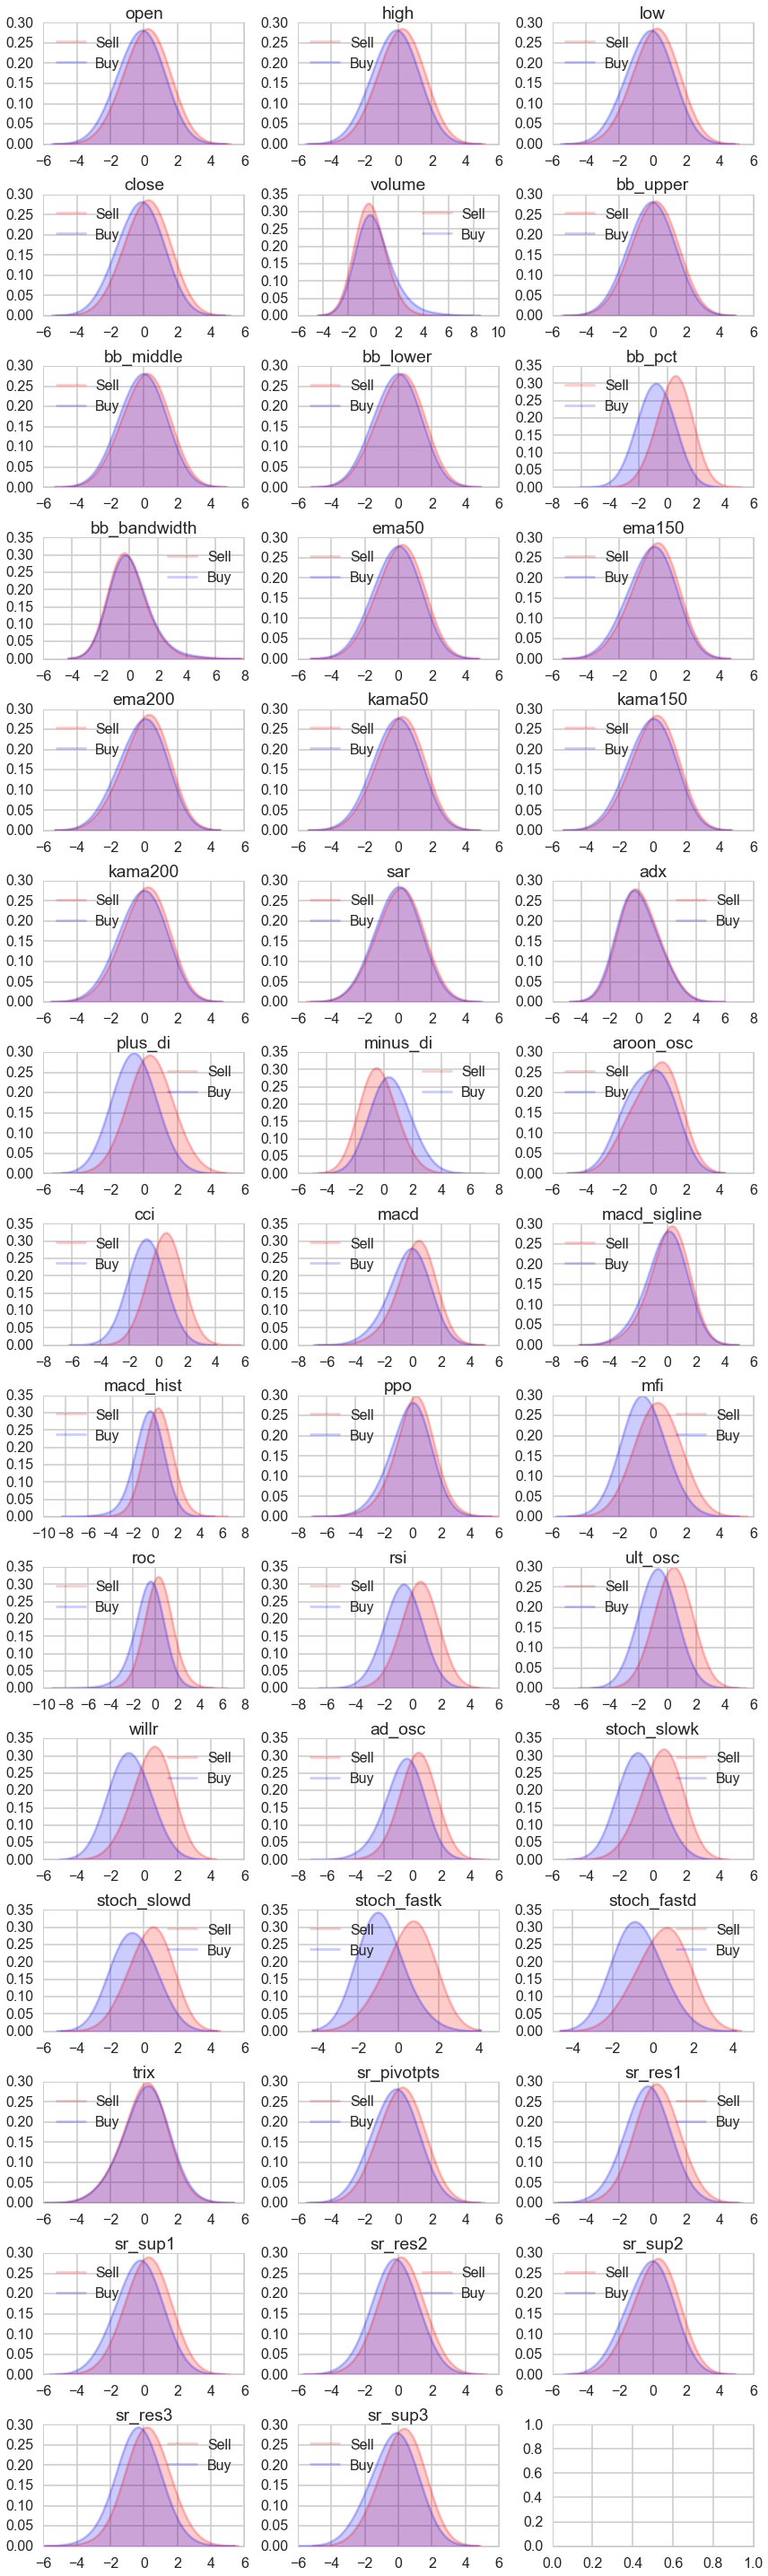

In [65]:
#Plot KDEs for ccols features
fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(12,40), tight_layout=True)

for ax1, col in zip(axes.ravel(), ccols):
    sns.kdeplot(dftouse[dftouse['results']==-1][col], ax=ax1, bw=1, label="Sell", shade=True, alpha=0.2, color='r')
    sns.kdeplot(dftouse[dftouse['results']==1][col], ax=ax1, bw=1, label="Buy", shade=True, alpha=0.2, color='b')
    ax1.set_title(col)

fig.show()

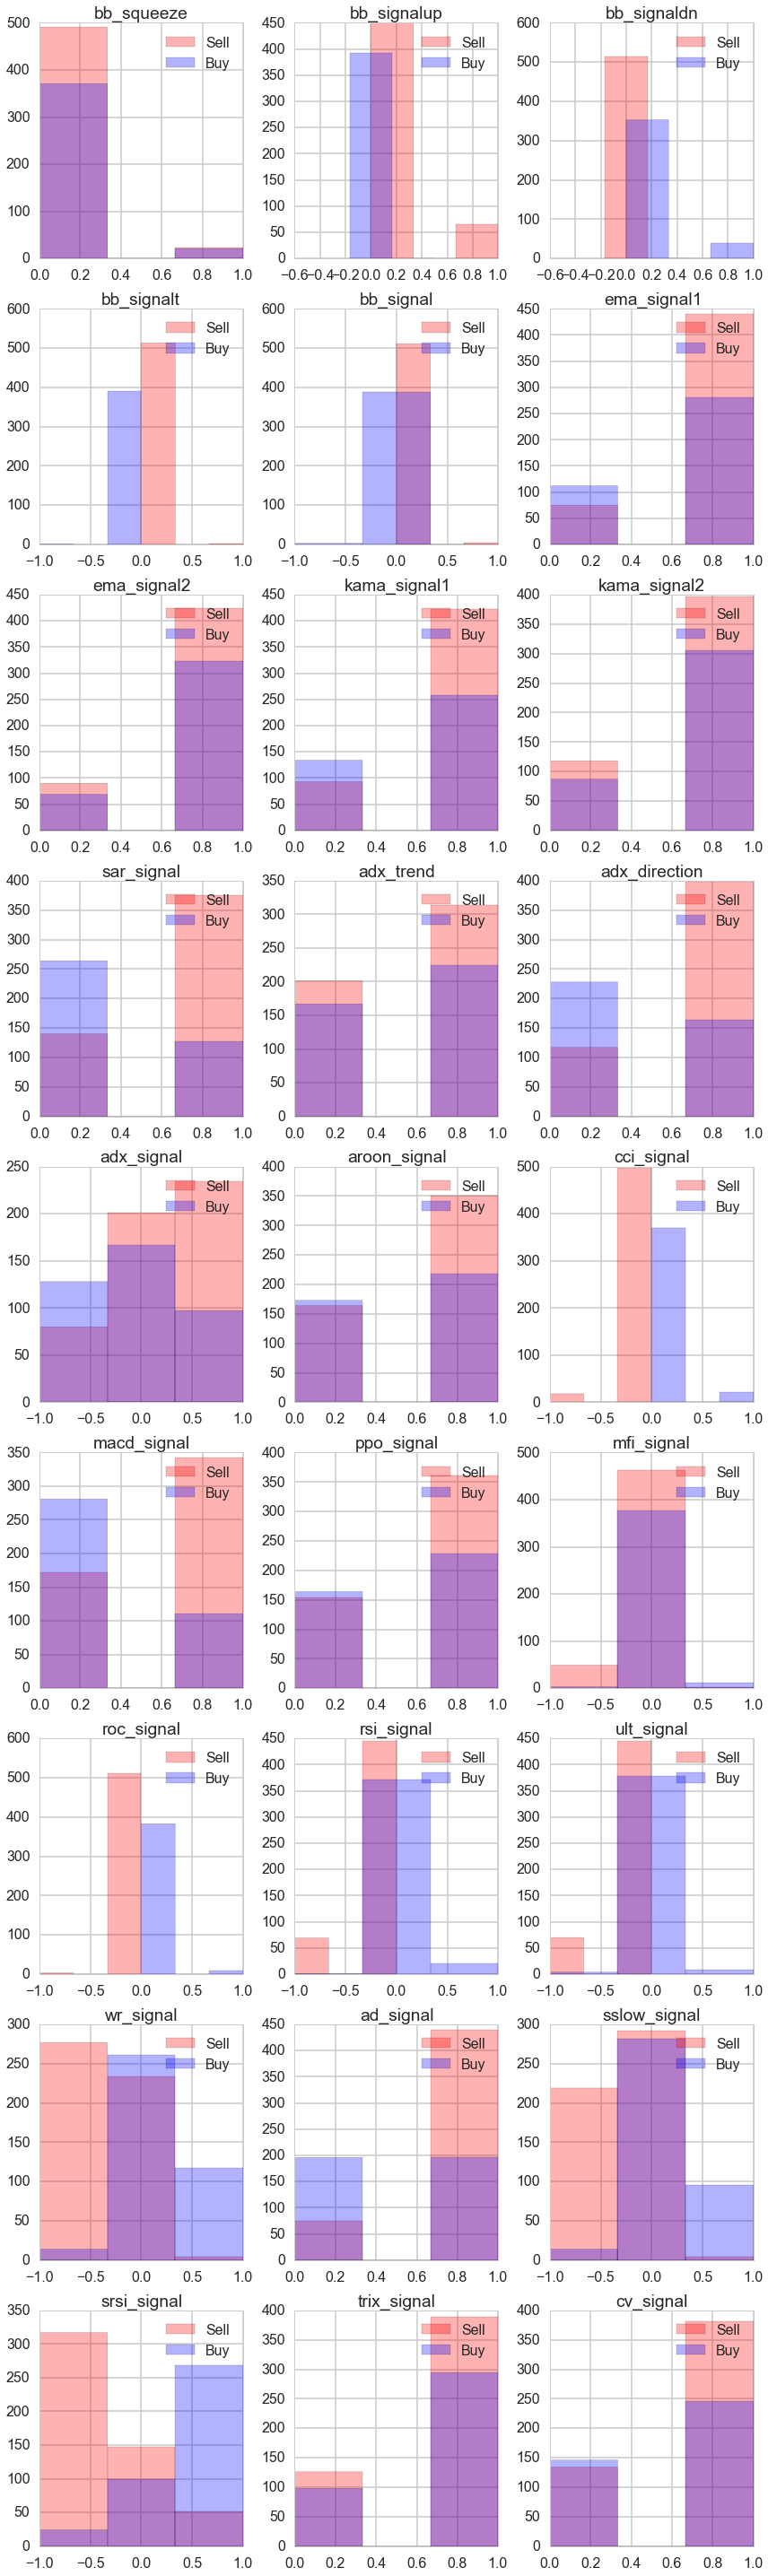

In [66]:
#Plot histograms for INDICATORS features
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(12,40), tight_layout=True)
    
for ax1, ind in zip(axes.ravel(), INDICATORS):
    ax1.hist(dftouse[dftouse['results']==-1][ind].values,bins=3,color='r',alpha=0.3, label="Sell")
    ax1.hist(dftouse[dftouse['results']==1][ind].values,bins=3,color='b',alpha=0.3, label="Buy")
    ax1.set_title(ind)
    ax1.legend()

fig.show()

### Writing code for a classifier

We will now take this data and write a classifier to predict the response, which is in the `RESP` column of `dftouse`. This response corresponds to asking the question: will a user targeted with our advertisement respond or not?

#### 1.4 Train a SVM on this data.

In [67]:
from sklearn.svm import LinearSVC

We set up a classifier using `LinearSVC`. This algorithm implements a linear SVM. We explicitly pass the standard SVM hinge loss (the default for this classifier in `sklearn` is the squared hinge loss). We choose the linear SVM here as our data size is fairly large, and kernelized SVM training time scales as the square of the number of the samples. Linear SVM, on the other hand, is fast.

In [68]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['results'].values

In [69]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

Use `GridSearchCV` over the parameter grid of regularization coefficients in the `Cs` array to get the best fit classifier using 5-fold cross validation. What value of `C` is the best one to choose? What is the accuracy? (This code will likely take a few minutes to run). Store the best classifier in  variable `best`. Fit the data again with this best classifier, and report on the accuracy of this classifier. HINT: a `GridSearchCV` instance (the variable a `GridSearchCV` object is stored in) has properties such as `best_params_`, `best_score_`, `grid_scores_`, and `best_estimator_`

In [70]:
#your code here
from sklearn.grid_search import GridSearchCV

gs = GridSearchCV(clfsvm, param_grid={"C": Cs}, n_jobs=1, cv=5, refit=True)
gs.fit(Xmatrix_train, Yresp_train)

print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
best = gs.best_estimator_

BEST {'C': 0.001} 0.605681818182 [mean: 0.60568, std: 0.02690, params: {'C': 0.001}, mean: 0.59545, std: 0.01428, params: {'C': 0.01}, mean: 0.57159, std: 0.01505, params: {'C': 0.1}, mean: 0.53864, std: 0.02734, params: {'C': 1.0}, mean: 0.53295, std: 0.03670, params: {'C': 10.0}, mean: 0.47955, std: 0.05670, params: {'C': 100.0}]


In [71]:
#calculate the accuracy here
#your code here
training_accuracy = gs.score(Xmatrix_train, Yresp_train)
test_accuracy = gs.score(Xmatrix_test, Yresp_test)

print "############# based on standard predict ################"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print "########################################################"

############# based on standard predict ################
Accuracy on training data: 0.63
Accuracy on test data:     0.58
########################################################


#### 1.5 Write a function to carry out grid-searched cross validation and use it on the SVM

Lets take the code above and encapsulate it into a function, since we are going to be running many, many classifiers here in this homework. 

You must provide below a function `cv_optimize`, which uses a Grid Search in parameters, and a default of 5-fold cross-validation. It takes as arguments a classifier `clf`, with hyper-parameter dictionary `parameters`, training feature matrix `X`, response `y`, number of folds `n_folds`, and custom scoring function `score_func`. It performs cross-validation using `GridSearchCV` along with a grid-search of hyperparameters. It obtains the best model by the average cross-validation score (allowing for a custom cross-validation score, not just those provided by `sklearn`), and finally returns this best model. (A custom scorer can be provided in the optional `score_func` argument to `cv_optimize`. Its default value should be `None`.)

This `cv_optimize` function is passed to the `do_classify` function below, so you can see how it is to be used before writing it.

In [72]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

We use this function to implement a function `do_classify` which provides a general interface to any classifier. This function `do_classify` can take either a `mask` or a `reuse_split` dictionary to specify which is the training set and which is the test set in X and y. In the former case the mask is used to choose which samples to use as training samples and which ones to use as test samples. In the latter case a dictionary is used to directly provide training and test sets. This is useful when the splits already been done and we want to test multiple classifiers on the same test set to compare their performance. An example of the `reuse_split` usage will be seen further down in this notebook. 

We construct the features from `featurenames` columns of the dataframe `indf`, while the column name `targetname` is used with `target1val` as the value that provides a `1` or `+ive` instance. A custom scorer can be provided in the optional `score_func` argument (with default value `None`). `n_folds` is the number of cross-validation folds, set to a default value of 5.

The function prints out the accuracy score on the training and test data, and also the confusion matrix associated with this classifier (more about confusion matrix in the next part of the homework). It returns the best_fit classifier, along with the training and test sets.

Note that the `parameters` dictionary is use to provide a parameter dictionary in the style of `GridSearchCV`, which indeed is used through the `cv_optimize` you provided.

In [73]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

We show how to use this by training the same linear SVM classifier with hinge loss. This classifier will once again be stored in the variable `clfsvm`. This takes a few minutes to run on a circa 2013 Macbook Air. Notice how we use this function carefully, as this will be an example of the usage of this function.

In [75]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'results',1, mask=mask)

using mask
BEST {'C': 0.01} 0.793181818182 [mean: 0.78295, std: 0.04215, params: {'C': 0.001}, mean: 0.79318, std: 0.04877, params: {'C': 0.01}, mean: 0.76818, std: 0.02561, params: {'C': 0.1}, mean: 0.75455, std: 0.02522, params: {'C': 1.0}, mean: 0.73750, std: 0.01964, params: {'C': 10.0}, mean: 0.71591, std: 0.02676, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.81
[[227  45]
 [ 26  80]]
########################################################
CPU times: user 1.55 s, sys: 10.9 ms, total: 1.56 s
Wall time: 1.62 s


/Users/ela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


The results obtained ought to be very similar to the efforts you put in earlier. If not its likely you wrote `cv_optimize` wrong. (Remember that we are using the same mask).

We'll reuse the training and test sets you computed above later in the homework. We do this by putting them into a dictionary `reuse_split`

In [76]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

## 2. Estimate costs and benefits from assumptions and data

### Our data is highly asymmetric

First notice that our data set is very highly asymmetric, with positive `RESP`onses only making up 16-17% of the samples.

In [77]:
print "whole data set", dftouse['results'].mean()#Highly asymmetric
print "training set", dftouse['results'][mask].mean(), "test set", dftouse['results'][~mask].mean()

whole data set -0.0977742448331
training set -0.0875 test set -0.121693121693


This means that a classifier which predicts that EVERY customer is a negative has an accuracy rate of 83-84%. By this we mean that **a classifier that predicts that no customer will respond to our mailing** has an accuracy of 83-84%!

#### 2.1 Compare the accuracy of the SVM to the no-customer-responds baseline

Based on your comparison, and using accuracy as a metric, does the classifier seem worthwhile pursuing?

###### Comparing the accuracy of the SVM to the no-customer-responds baseline, the SVM classifier does NOT seem worthwhile pursuing. The SVM accuracy was 84-85%, while the baseline accuracy is 83-84%. The difference is negligible.

But we havent asked the most important question. Is accuracy really the relevant metric?

### Costs and the Confusion Matrix

Our classifier above had, as one of its printed outputs, a confusion matrix. It looked like this:

In [78]:
ypred=clfsvm.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[227,  45],
       [ 26,  80]])

The matrix above is of this form:

![hwimages](./images/confusionmatrix.png)


**Important note**: In sklearn, to obtain the confusion matrix in the form above, always have the observed `y` first, i.e.: use as `confusion_matrix(y_true, y_pred)`

In our example, +ives (those with a 1 `RESP`onse) are people who respond to the mailing by going into the store and buying goods. These are also called observed positives (OP). And -ives (those with a 0 `RESP`onse) are those who do not respond to the mailing. These are also called observed Negatives. On our test set, we can print the observed positives and observed negatives respectively:

In [79]:
print "OP=", ytest.sum(), ", ON=",ytest.shape[0] - ytest.sum()

OP= 106 , ON= 272


We can make a similar calculation on the predictions of our SVM classifier made on the test set. This gives us the predicted negatives (PN): those customers who we predict will not respond to our mailing; and the predicted positives (PP), the customers who we predict will respond to our mailing by coming into the store to buy stuff.

In [80]:
print "PP=", ypred.sum(), ", PN=",ytest.shape[0] - ypred.sum()

PP= 125 , PN= 253


In addition to these four quantities, the confusion matrix gives us more details on proper classifications and mis-classifications from our classifier:

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP). These are folks we correctly identified as responders,and thus sending them a mailing would result in a sale for us. True Positives are great. We do incur the cost of mailing them, but we like to because they will come into the store to buy.
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP). False Positives incur us the cost of mailing them as well, but are not very costly. These are people who wouldnt have responded, but we sent them a mailing because our classifier mispredicted them as buyers. Thus, for them, we only incur the cost of preparing the mailing and mailing it to them.
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN). These are folks we correctly identified as not-responding, and thus we dont waste any money on sending them a mailing. This is a great classification for us.
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN). False negatives are VERY costly: these are folks who would have responded to us had we mailed them, but we didnt target them, leading to huge lost sales per person. Notice that our SVM classifier has tons of False Negatives

It is not enough to simply identify these categories from the confusion matrix. Rather, we want to sit down with our business team and identify the costs associated with each of the 4 classification situations above. Keep in mind that these costs might even change from year to year or even more suddenly: this is why it is important to have marketing and sales people on your data science teams. (See Patil, D. J. Building data science teams. " O'Reilly Media, Inc.", 2011.
 for more details).
 
 Fortunately you have talked to your domain experts and done just that!

#### 2.5 Implement logistic regression with Lasso based feature selection

In desperation, we run another classifier, a logistic regression with L1 regularization, using the `do_classify` function we defined above. L1 or Lasso regularization automatically does feature selection for us!

Return as the estimator `clflog`, and training and test sets `Xtrain`, `ytrain`, `Xtest`, and `ytest`. Let the regularization hyperparameter `C` range in powers of 10 from 0.001 to 100. Use the `reuse_split` dictionary we calculated earlier. Remember that we want to use "L1" or Lasso regularization: you can do this by passing `penalty="l1"` to the Logistic Regression: `clf=LogisticRegression(penalty="l1")`.

In [82]:
#your code here
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
clflog, Xtrain, ytrain, Xtest, ytest = do_classify(clflog, parameters, dftouse, lcols, u'results',1, mask=mask, reuse_split=reuse_split)

using mask
using reuse split
BEST {'C': 0.01} 0.806818181818 [mean: 0.67500, std: 0.00152, params: {'C': 0.001}, mean: 0.80682, std: 0.02651, params: {'C': 0.01}, mean: 0.80682, std: 0.04088, params: {'C': 0.1}, mean: 0.76364, std: 0.01682, params: {'C': 1}, mean: 0.75341, std: 0.01497, params: {'C': 10}, mean: 0.73523, std: 0.01874, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.80
[[214  58]
 [ 18  88]]
########################################################


/Users/ela/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Calculate the profit that this classifier gives us:

In [83]:
#your code here
print confusion_matrix(ytest, clflog.predict(Xtest))
#average_profit_pp(ytest, clflog.predict(Xtest), u)

[[214  58]
 [ 18  88]]


You will find that this logistic regression does a slightly better job, but does little to lift our despondency. What is wrong?

### Prediction and Re-prediction

In question 2.1 we asked how the accuracy of our SVM classifier compares to that of the baseline classifiers we tested. However, is this the real question of importance? Our dataset is a very lopsided data set with 84% of samples being negative. In such a case, accuracy is not a very good measure of a classifier.

Then, in question 2.4 and 2.5 we see that the performance of our SVM classifier, even with the "profit" metric instead of the accuracy metric is no big shakes. Indeed, it is outperformed by one of our baseline classifiers. Then we tried the Logistic Regression. That gave us some hope, but even there, the performance turned out to be awful.

What gives?

We were doing something wrong there.

In the case of such asymmetric costs, the `sklearn` API function `predict` is useless, as it assumes a threshold probability of having a +ive sample to be 0.5; that is, if a sample has a greater than 0.5 chance of being a 1, assume it is so. Clearly, when FN are more expensive than FP, you want to lower this threshold: you are ok with falsely classifying -ive examples as +ive. See Lab 5 for how this can be done.

You can think about this very starkly from the perspective of the cancer doctor. Do you really want to be setting a threshold of 0.5 probability to predict if a patient has cancer or not? The false negative problem: ie the chance you predict someone dosent have cancer who has cancer is much higher for such a threshold. You could kill someone by telling them not to get a biopsy. Why not play it safe and assume a much lower threshold: for eg, if the probability of 1(cancer) is greater than 0.05, we'll call it a 1.

Let us do this for our logistic regression example

#### Start with an arbitrary threshold t, and see how we fare at different thresholds for logistic regression

In [84]:
def t_repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

We see average profits for multiple thresholds for the logistic regression classifier `clflog`. 

## 3. Comparing Models with ROC and Profit curves.

### Thresholds, Comparing Models, and the ROC Curve 

ROC curves are a set of classifiers, many of them, each point corresponding to a different threshold (go read Lab 6 for more details). They are useful to compare classifiers to each other and also to baseline models.
(In the standard scenario, where we used the  classifier accuracy, this threshold is implicitly set at 0.5, and we have only one point on the ROC curve.).

The practical way to do this is to order the samples by probability of being positive, or in the case of the SVM, by the `decision_function` or distance from the separating hyperplane. Then consider the sample with the highest score or highest probability of being positive. At first, only this sample is positive. Then, we take the sample with the next highest score, and call it positive. As we go down the list, we go down a threshold in score or probability. 

Now, for each such situation: only 1 positive, now 2 positive,....you can imagine a different classifier with a different confusion matrix. It will have its own false positives, three positives, etc. Its actually the same original classifier, but with a different threshold each time.

As we keep going down the list, decreasing the threshold, more and more samples become positive, and at first, the true positives rise faster than the false positives. Once past a certain point, false positives increase faster than true positives. Now, if you want a balanced classifier, you look at this turn-around point...the northwest corner, so to speak. But if you want a classifier which penalizes false positives and false negatives differently, the point you want is different.

To make a ROC curve you plot the True Positive Rate, 

$$TPR=\frac{TP}{OP}$$

against the False Positive Rate,

$$FPR=\frac{FP}{ON}$$

as you go through this process of going down the list of samples. ROC curves are useful because they calculate one classifier per threshold and show you where you are in TPR/FPR space without making any assumptions about the utility matrix or which threshold is appropriate.


A rote reading of the ROC curve (go to the "northwest" corner) is a bad idea: you must fold in the curve with any assumptions you are making about the utilities. In our case we have both an asymmetric data set, and asymmetric risk, so the north west corner may not be the right spot. Still, on the whole, a curve with a greater AUC (area under curve), or further away from the line of randomness, will give us a rough idea of what might be a better classifier.

We provide example code `make_roc` for you to calculate a ROC curve. Pass `proba=False` to `make_roc` for non-probabilistic classifiers: notice how we use `decision_function` here instead of `predict_proba`.

This function uses `roc_curve` from sklearn: note that this function carries out the process we described and gives us back a triplet of `fpr`, `tpr`, and `thresholds`. We also calculate the `auc`, and plot the roc curve with thresholds, skipping every `labe` number of thresholds to make labels.

In [85]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

Here is an example of the usage of this function. Play with it to see how to label things

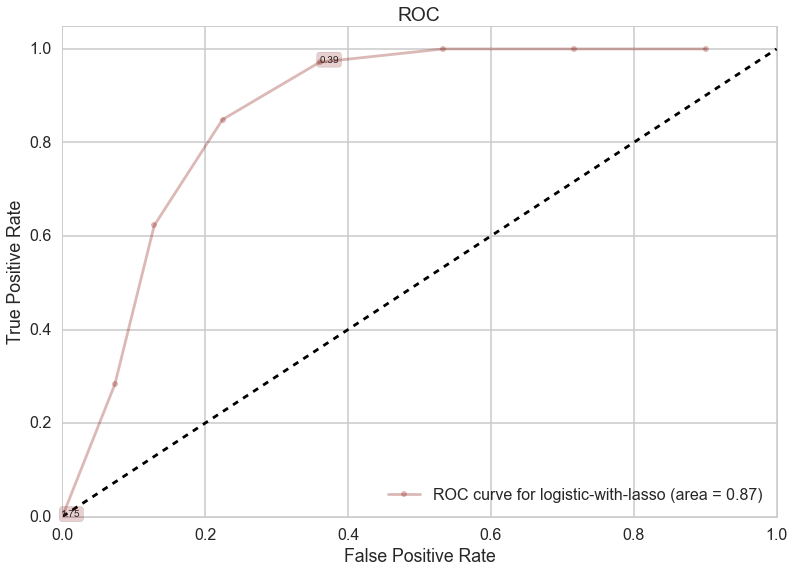

In [86]:
#notice for the first plot we do not pass an axes object. Subsequent calls to
#make_roc can use the returned axes object ax.
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)

#### 3.1 Plot ROC curves

Plot ROC curves for the logistic regression classifier `clflog`, and linear SVM classifier `clfsvm` below. Label the curve for the former classifier `logistic-with-lasso`, and the latter classifier, `svm-all-features` . Choose colors using `with sns.color_palette("palletename")` that make the curves easily separable. (see https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html)

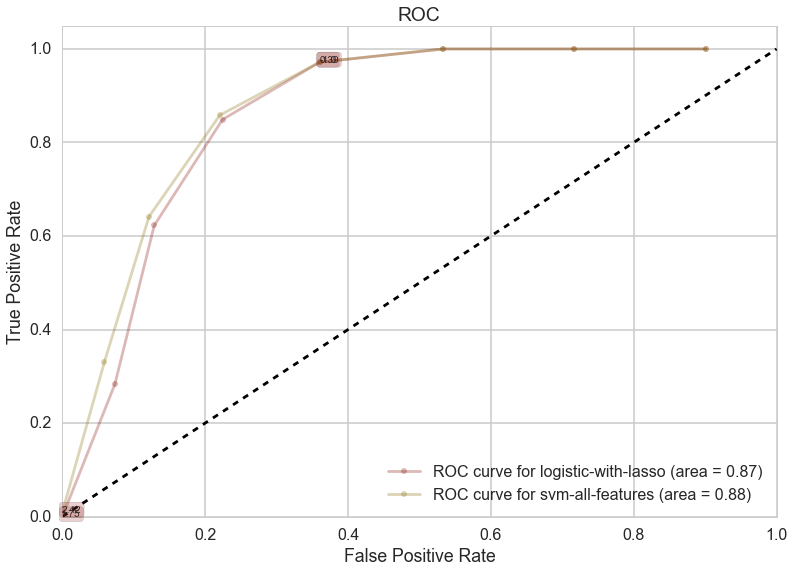

In [87]:
#your code here
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso", clflog, ytest, Xtest, None, labe=200, skip=50)
    make_roc("svm-all-features", clfsvm, ytest, Xtest, ax, proba=False, labe=200, skip=50)

#### Tangent lines on a ROC curve

To see what needs to be done to calculate the correct spot on the ROC curve, or correct threshold for our classifier, see Lab 6. It basically involves drawing tangent lines to the ROC curves classifier, where the slope is:

$$slope = r \frac{p(0A)}{p(1A)}$$

where

$$r=\frac{c_{FP} - c_{TN}}{c_{FN} - c_{TP}}$$

The lines of equal cost are given by (these are straight lines for fixed Cost):

$$TPR = \frac{1}{p(1A)(c_{FN} - c_{TP})} \left ( p(1A) c_{FP} + p(0A) c_{TN} - Cost \right ) + r \frac{p(0A)}{p(1A)} \times FPR$$

Minimum cost means we maximize the intercept, and thus we must look for tangent lines to the ROC curve of the classifier (the appropriate thresholded classifier must be on the ROC curve).


(See Provost, Foster J., and Tom Fawcett. "Analysis and visualization of classifier performance: Comparison under imprecise class and cost distributions." KDD. Vol. 97. 1997 and Fawcett, Tom. "ROC graphs: Notes and practical considerations for researchers." Machine learning 31 (2004): 1-38.)

Further Reading: The book (online on Safari at Harvard) Provost, Foster, and Tom Fawcett. Data Science for Business: What you need to know about data mining and data-analytic thinking. " O'Reilly Media, Inc.", 2013 contains a great discussion of this and many other machine learning topics. (Also see https://ccrma.stanford.edu/workshops/mir2009/references/ROCintro.pdf and http://www.hpl.hp.com/techreports/2003/HPL-2003-4.pdf)

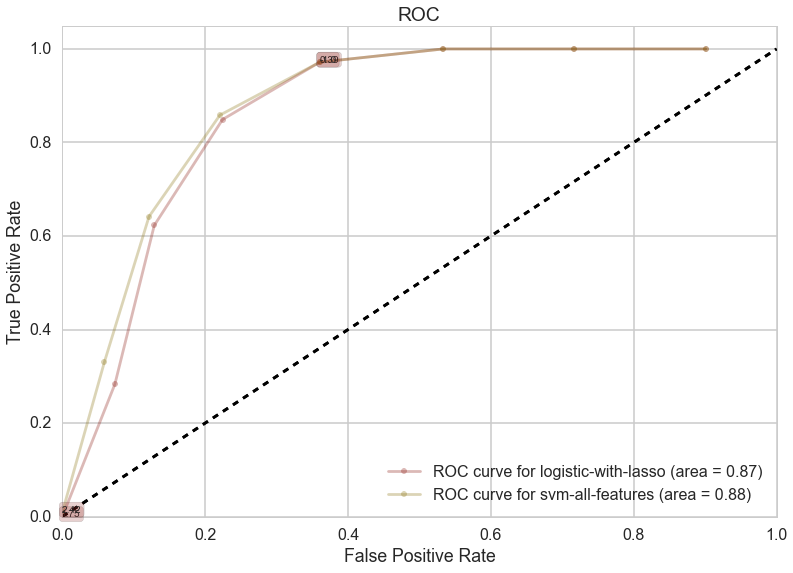

In [89]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso", clflog, ytest, Xtest, labe=200, skip=50)
    make_roc("svm-all-features", clfsvm, ytest, Xtest, proba=False, labe=200, skip=50)
z1=np.arange(0.,1., 0.02)
#ax.plot(z1 , slope*z1 + 0.85, 'k-', color="r", alpha=0.5, label="Tangent to logistic-with-lasso")
#ax.plot(z1 , slope*z1 + 0.79, 'k-', color="g", alpha=0.5, label="Tangent to svm-all-features")
plt.legend(loc='lower right')

## 4. Trying to improve the SVM: Feature Selection and Data Balancing

If you did the previous section right, you will find that the logistic regression model provides a better profit over some section of the profit curve than the baseline "send to everyone" classifier, while the SVM classifier is generally poor. At this might we might want to try all kinds of classifiers: from perceptrons to random forests. In the interest of time, and to study the SVM in some more detail, we'll restrict ourselves to trying to improve the SVM performance here. In real life you would try other classifiers as well.

 We wont be exhaustive in this improvement process either(which is something you should do on your project) in the interests of time, but we'll explore if feature-selection on the  SVM, and data balancing on the SVM (SVM's are known to perform better on balanced data) help.
 
( An aside: many classifiers such as SVM and decision trees struggle in their techniques on imbalanced data. You can read more at: see Weiss, Gary M., and Foster Provost. "The effect of class distribution on classifier learning: an empirical study." Rutgers Univ (2001). Also see http://pages.stern.nyu.edu/~fprovost/Papers/skew.PDF and http://www.cs.ox.ac.uk/people/vasile.palade/papers/Class-Imbalance-SVM.pdf for multiple ways to deal with the imbalance problem: balancing is not always the best option. `Sklearn` also provides a class weighting strategy: http://scikit-learn.org/stable/modules/svm.html#unbalanced-problems ). 

### Feature Selection

The Lasso, for example, implements internally, a form of feature selection by setting many coefficients to zero. Let us find coefficients that are non-zero.

#### Non zero lasso features

We write a function `nonzero_lasso` which takes the fit classifier `clfloglasso` as an argument, and spits out a dataframe of coefficients, sorted by the absolute magnitude of the coefficients. This way we can see which features dominated the logistic regression.

In [90]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [91]:
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

,abscoef,coef
feature,,
stoch_fastk,0.496162,-0.496162
willr,0.308303,-0.308303
ad_signal,0.177916,-0.177916


#### 4.1 Feature importance using correlations

We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns `abscorr` the absolute value of the correlation and `corr` the value of the correlation. Sort the dataframe by `abscorr`, highest first, and show the top 25 features with the highest absolute correlation. Is there much overlap with the feature selection performed by the LASSO?

In [93]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['results'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
stoch_fastk,0.575169,-0.575169
willr,0.562559,-0.562559
srsi_signal,0.556962,0.556962
stoch_slowk,0.543207,-0.543207
cci,0.539754,-0.539754
bb_pct,0.538946,-0.538946
stoch_fastd,0.516116,-0.516116
wr_signal,0.502314,0.502314
rsi,0.488660,-0.488660


#### Why Feature Select?

One of the reasons feature selection is done, automatically or otherwise, is that there might be strong correlations between features. Also recall polynomial regression: a large number of features can lead to overfitting. Feature selection helps curb the problem of the curse of dimensionality, where centrality measures often used in statistics go wonky at higher dimensions. Between feature-engineering which we did some of, earlier, and feature selection, is where a lot of smarts and domain knowledge comes in. You will gain this with experience.

### Create a pipeline to feature-select, standardize and train!

We shall use sklearn pipelines to do correlation-with-response based feature selection for our SVM model. Maybe such feature-selection will improve the abysmal performance. 

This does not reduce the collinearity amongst the features, for which one either needs PCA, ICA, or some feature selection using the forward-backward algorithm. We do not have the time to approach it here. 

Its very important to do response based feature selection in the right way. If you remember, we separately standardized the training and test sets. This was to prevent **any** information about the overall mean and standard deviation leaking into the test set. 

But we played a bit loose with the rules there. We standardized on the entire training set. Instead we should have been standardizing separately in each cross-validation fold. There the original training set would be broken up into a sub-training and validation set, the standardization needed to be done on those separately. This can be implemented with `sklearn` pipelines.

Such kind of "data snooping" is relatively benign though, as it used no information about the response variable. But if you do any feature selection which uses the response variable, such as choosing the "k" most correlated variables from above, its not benign any more. This is because you have leaked the response from the validation into your sub-training set, and cannot thus be confident about your predictions: you might overfit. In such a situation, you must do the feature selection inside the cross-validation fold. See http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_10_cross_val.ipynb from the 2013 course for a particularly dastardly case of this, where you see that the problem is particularly exacerbated when you have many more features than samples.

Lets do this here using sklearn pipelines.

In [94]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

Lets define a scorer which returns the absolute values of the pearson correlation between the feature and the response for each sample. The specific form of the scorer is dictated to us in the API docs for `SelectKBest`, see [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): the first argument must be an array of scores, and the second an array of p-values.

In [95]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals    

Lets apply the feature selection to a model which did not have any automatic feature selection and performed rather poorly before: the linear SVM. 

The `Pipeline` feature of sklearn chains various parts of a machine learning algorithm together. In this case we want to chain feature-selection and training in such a way that both happen freshly for each cross-validation fold (we wont bother to standardize in each cross-validation fold separately here for brevity, although you might want to do this).
We use the `SelectKBest` meta estimator to select the 25 most correlated/anti-correlated features. We create an instance of this meta-estimator, `selectorlinearsvm`. We then combine it with the linear SVC estimators into the pipeline `pipelinearsvm`: the `Pipeline` function simply takes a list of `scikit-learn` estimators and wraps them together into a new estimator object, which can then be passed to `GridSearchCV` via our `do_classify` function. Notice how this new estimator object can be used exactly the same way as a single classifier can be used in `scikit-learn`..this uniformity of interface is one of the nice features of `sklearn`!

In [96]:
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])


#### Let us run the pipelined classifier 

We'll run the classifier and compare the results using the ROC curve to the previous SVM result.

In [97]:
pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'results',1, reuse_split=reuse_split)

using reuse split
BEST {'svm__C': 0.01} 0.803409090909 [mean: 0.76818, std: 0.04512, params: {'svm__C': 1e-05}, mean: 0.78977, std: 0.04092, params: {'svm__C': 0.001}, mean: 0.80341, std: 0.03810, params: {'svm__C': 0.01}, mean: 0.79886, std: 0.02776, params: {'svm__C': 0.1}, mean: 0.79318, std: 0.03044, params: {'svm__C': 1.0}, mean: 0.79432, std: 0.01975, params: {'svm__C': 10.0}, mean: 0.71477, std: 0.08953, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.81
[[223  49]
 [ 24  82]]
########################################################


What features did the pipelined classifier use? We can access them so:

In [98]:
np.array(lcols)[pipelinearsvm.get_params()['select'].get_support()]

array(['bb_pct', 'bb_signaldn', 'sar_signal', 'plus_di', 'minus_di',
       'adx_direction', 'cci', 'macd_hist', 'macd_signal', 'mfi', 'roc',
       'rsi', 'rsi_signal', 'ult_osc', 'willr', 'wr_signal', 'ad_osc',
       'ad_signal', 'stoch_slowk', 'stoch_slowd', 'sslow_signal',
       'stoch_fastk', 'stoch_fastd', 'srsi_signal', 'sr_res1'], 
      dtype='|S13')

We plot the ROC curves, using the label `svm-feature-selected` for the pipelined classifier `pipelinearsvm`. We plot it alongside the older logistic-with lasso and all-features SVM for comparison

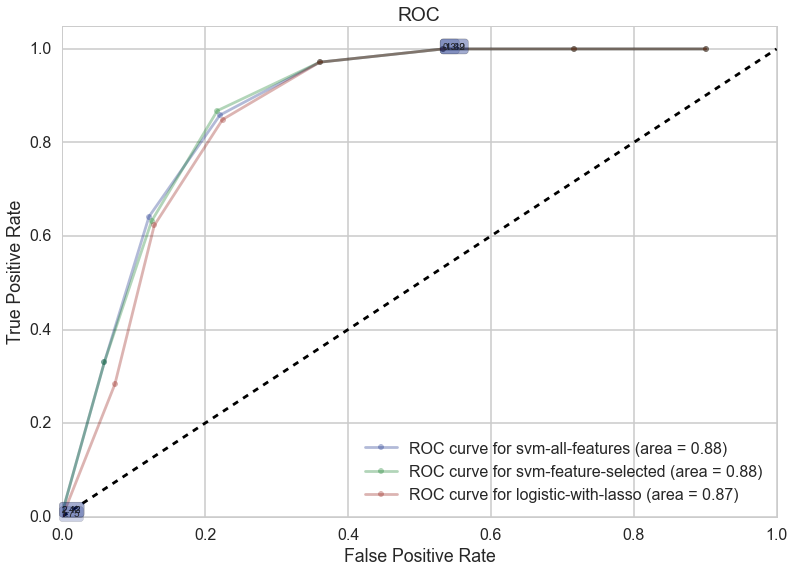

In [99]:
with sns.color_palette("dark"):
    ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
    make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
    make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax, labe=250, proba=True,  skip=50);

Did we do much better or much worse? The results on the ROC curve are slightly better, comparable, or a bit worse, but still no great shakes compared to the logistic regression. And you can clearly see that the logistic regression will have a higher intercept and thus lower cost. One of the reasons for this is that SVM does not do terribly well on an unbalanced data set. So lets balance the data set.

### Balancing train set to test set for training.

In [100]:
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg

286 594


There are many more negative samples in the training set. We want to balance the negative samples to the positive samples. So lets sample $n_{+}$ samples from the negative samples in the training set (without replacement).

In [101]:
ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)

We concatenate all the indexes and use them to select a new training set from the old one.

In [102]:
alli=np.concatenate((jtrain[ytrain==1], ineg))
alli.shape

(572,)

In [103]:
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
Xtrain_new.shape, ytrain_new.shape

((572, 71), (572,))

We store these into a new split variable `reuse_split_new`.

In [104]:
reuse_split_new=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

Note that the test sets are identical as before. This is as, even though we are training the SVM classifier in the "naturally" unfound situation of balanced classes, we **must test it in the real-world scenario of imbalance**.

#### 4.2 Train a linear SVM on this balanced set

Train a non-feature-selected linear SVM on this new balanced set as a comparison to both our old SVM on the imbalanced data set `clfsvm` and the feature-selected linear SVM `pipelinearsvm`. Store this new classifier in the variable `clfsvm_b`.

Compare the performances of all three of these classifiers using the roc curve plot, with the new `clfsvm_b` labeled as `svm-all-features-balanced`. 

In [106]:
#your code here
clfsvm_b = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])
clfsvm_b, _,_,_,_  = do_classify(clfsvm_b, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)

using reuse split
BEST {'svm__C': 0.01} 0.804195804196 [mean: 0.78322, std: 0.04816, params: {'svm__C': 1e-05}, mean: 0.80245, std: 0.03692, params: {'svm__C': 0.001}, mean: 0.80420, std: 0.03834, params: {'svm__C': 0.01}, mean: 0.79895, std: 0.04381, params: {'svm__C': 0.1}, mean: 0.78671, std: 0.04293, params: {'svm__C': 1.0}, mean: 0.78671, std: 0.03323, params: {'svm__C': 10.0}, mean: 0.74126, std: 0.09549, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.79
[[203  69]
 [ 10  96]]
########################################################


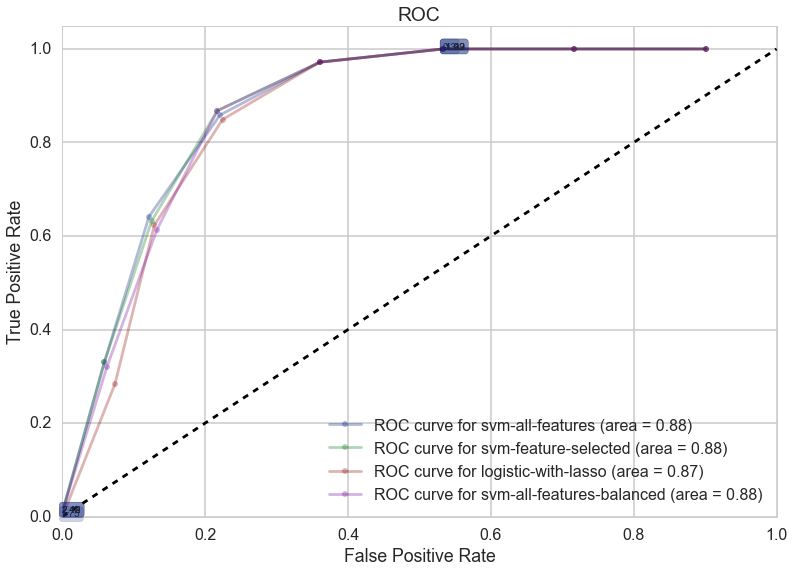

In [107]:
#your code here
with sns.color_palette("dark"):
    ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
    make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
    make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax, labe=250, proba=True,  skip=50);
    make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, ax, labe=250, proba=False,  skip=50);

If you did this correctly, balancing the data set should have helped improve the performance of the SVM, way more than the feature selection did. We can look at the profit curves, adding in the logistic-regression this time:

Indeed, the all-features, balanced data set SVM outperforms the other SVMs in making us a profit, and is starting to be competitive to the logistic regression. So why bother about feature selection at all?

The reason is that linear SVM's are about the simplest SVM's we can run. Perhaps the problem separates better with a non-linear boundary and may benefit from kernelizing the SVM.

### Running a kernelized SVM

But the problem with kernelization is that both the dimension of the data (vertical) and the dimension of the features (horizontal) land up impacting the run time. Kernelization is expensive. (quadratic in number of samples and linear in number of features).

Now, generally on a SVM you want to run on the full feature space, with strong regularization. But in the interests of this homework finishing in a finite number of time, we'll keep the feature selection going. Still, since run-time is quadratic on samples, we will need to subsample our training set down.

Let us try a Radial Basis Function (RBF) Kernel. Setting it up, we wish to use the smaller balanced set, but also engage in feature selection. The RBF kernel has two parameters `C`, which controls the number of support vectors: large `C`s (low regularization) mean many more support vectors; and $\gamma$, which is in the inverse square radius of the RBF kernel. A small $\gamma$ means a large radius scale, and favors smoother, less curved classifications. There is a tradeoff between the two, which you can read about here: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html . Models with high C tend to take a lot of time to run (hours->days on my laptop), so we shall, in the interests of time fix the $C$, OR the support vectors allowed us at a reasonably large value and cross-validate only on $\gamma$.

#### 4.3 Implement a RBF based pipelined (feature-selected) classifier on the balanced set.

In [108]:
from sklearn.svm import SVC

To run a kernelized SVM you must import the `SVC` module from `sklearn`, instead of `linearSVC`. The time it takes to run this code is very variable, being much more at low regularization: high C, and  large gamma (which corresonds to a small kernel radius).   Use `pipesvm2` as the variable for the classifier. Choose hyperparameter `C` at `1e-8` and  values for `gamma`, with 3 exponential steps, `1e-5`, `1e-07`, and `1e-9`. Usually we want to run this on a much larger parameter space, but that would take a lot of time.

We first set up the pipeline:

In [109]:
selectorsvm2 = SelectKBest(k=25, score_func=pearson_scorer)
pipesvm2 = Pipeline([('select2', selectorsvm2), ('svm2', SVC())])


And then subsample to as little as 300 positive and negative samples each, since (as the SVC documentation says), the scaling with the number of samples is more than quadratic.

In [111]:
jtrain_new=np.arange(0, ytrain_new.shape[0])
ipos_new = np.random.choice(jtrain_new[ytrain_new==1], 30, replace=False)
ineg_new = np.random.choice(jtrain_new[ytrain_new==0], 30, replace=False)
subsampled_i=np.concatenate((ipos_new,ineg_new))
Xtrain_new2=Xtrain_new[subsampled_i]
ytrain_new2=ytrain_new[subsampled_i]

We set up a subsampled reuse dictionary below. Note that the testing sizes and positive-negative balance once again remain the same as in the original problem. 

In [112]:
reuse_split_subsampled=dict(Xtrain=Xtrain_new2, Xtest=Xtest, ytrain=ytrain_new2, ytest=ytest)

Your job now is to write the one-line `do_classify` incantation to run this classifier. This takes between 8-10 mins on my machine

In [113]:
%%time
#your code here
pipesvm2, _,_,_,_  = do_classify(pipesvm2, {"svm2__C": [1e8], "svm2__gamma": [1e-5, 1e-7, 1e-9]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_subsampled)

using reuse split
BEST {'svm2__C': 100000000.0, 'svm2__gamma': 1e-09} 0.783333333333 [mean: 0.68333, std: 0.16159, params: {'svm2__C': 100000000.0, 'svm2__gamma': 1e-05}, mean: 0.65000, std: 0.12247, params: {'svm2__C': 100000000.0, 'svm2__gamma': 1e-07}, mean: 0.78333, std: 0.11304, params: {'svm2__C': 100000000.0, 'svm2__gamma': 1e-09}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.78
[[196  76]
 [  8  98]]
########################################################
CPU times: user 248 ms, sys: 3.53 ms, total: 252 ms
Wall time: 286 ms


#### 4.4 Refit the best model on the entire balanced  data set, rather than the subsampling

With a best model selected, let us run the classifier again for the given value of $C$ and the fit value of $\gamma$ on the larger data set, and see our results. Output the classifier as `pipesvm3`. (Dont forget to run the entire pipeline again, even though there is no cross-validation. Also remember to pass the params directly to the classifier `SVC` as its arguments, setting the `parameters` argument of `do_classify` to `None`.) The code takes about 3-5 minutes on my computer.

In [115]:
%%time
#your code here
selectorsvm3 = SelectKBest(k=25, score_func=pearson_scorer)
pipesvm3 = Pipeline([('select3', selectorsvm3), ('svm3', SVC(C=1e8,gamma=1e-7))])
pipesvm3, _,_,_,_  = do_classify(pipesvm3, None, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.78
[[208  64]
 [ 21  85]]
########################################################
CPU times: user 77.8 ms, sys: 1.53 ms, total: 79.4 ms
Wall time: 100 ms


## 5. Final steps: Making decisions, and writing to your boss

### Choosing a classifier and making a profit

#### 5.1 Compare multiple classifiers to make a decision on which one to use.

Using ROC curves and profit curves, compare the Lasso Logistic classifier `clflog`,  the kernel-svm feature-selected, balanced classifier `pipesvm3` you calculated in 4.3(labelled `rbf-svm-feature-selected-balanced`, and the linear svm all-features, balanced classifier, `clfsvm_b` on the original test set. You might need to zoom in to relevant parts of the curve. Comment on the results: which classifier is the best? How does the new RBF kernel SVM do now?